A chooser option is an option contract that allows the holder to decide whether it is to be a call or put before the expiration date. Chooser options usually have the same strike price and expiration date regardless of what decision the holder makes. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Heston Model Parameters

In [2]:
S0 = 100.0 # initial stock price
K = 110.0 # strike price
T = 1.0 # time to maturity
r = 0.05 # risk-free interest rate
v0 = 0.04 # initial volatility
theta = 0.04 # long-term mean of volatility 
kappa = 9.0 # mean-reversion speed of volatility 
sigma = 0.3 # volatility of volatility
rho = -0.5 # correlation between stock price and volatility

Chooser Option Parameters and Monte Carlo Simulation Parameters

In [3]:
# Chooser Option Parameters
t_choice = 0.5 # time to choose between call and put 
is_call = True # True for call, False for put

# Monte Carlo Simulation Parameters 
M = 10000 # number of simulations 
N = 100 # number of time steps 
dt=T/N #timestepsize

Heston Model Simulation

In [4]:
np.random.seed(123)
S = np.zeros((M, N+1)) 
S[:, 0] = S0
v = np.zeros((M, N+1)) 
v[:, 0] = v0

In [5]:
for i in range(1, N+1):
    Z1 = np.random.standard_normal(M)
    Z2 = rho * Z1 + np.sqrt(1 - rho**2) * np.random.standard_normal(M)
    v[:, i] = np.abs(v[:, i-1] + kappa * (theta - v[:, i-1]) * dt + sigma * np.sqrt(v[:, i-1] * dt) * Z1) 
    S[:, i] = S[:, i-1] * np.exp((r - 0.5 * v[:, i-1]) * dt + np.sqrt(v[:, i-1] * dt) * Z2)

Option Pricing by Monte Carlo Simulation

In [6]:
S_choice = int(t_choice / dt) 
if is_call:
    payoff = np.maximum(S[:, S_choice] - K, 0) 
else:
    payoff = np.maximum(K - S[:, S_choice], 0)
option_price = np.exp(-r * (T - t_choice)) * np.mean(payoff) 
std_error = np.exp(-r * (T - t_choice)) * np.std(payoff) / np.sqrt(M)

Visualization of Payoff Graph and Stock Price Simulation

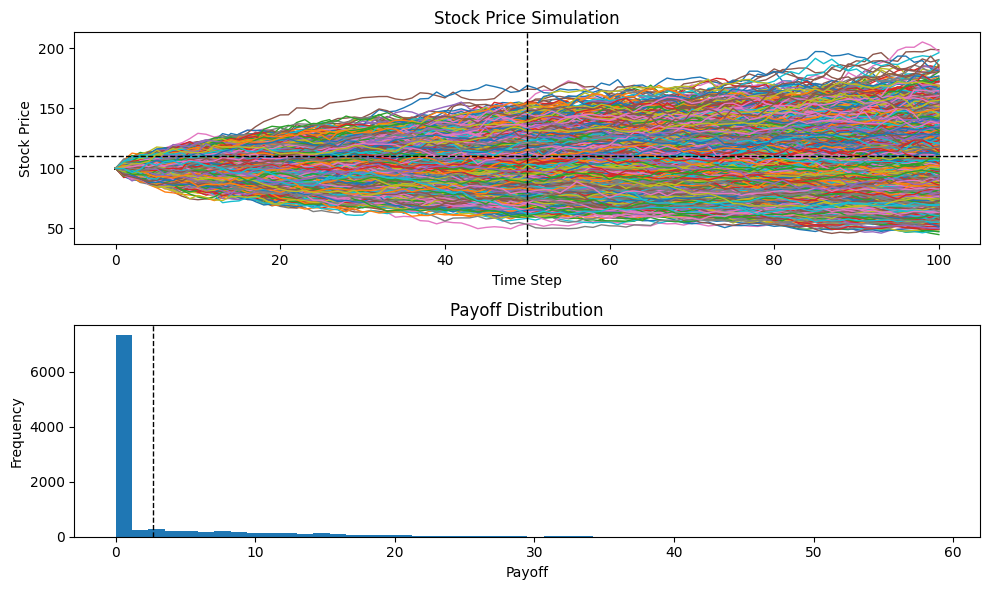

In [7]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(S.T, lw=1)
plt.axvline(S_choice, color='k', ls='--', lw=1) 
plt.axhline(K, color='k', ls='--', lw=1) 
plt.title('Stock Price Simulation') 
plt.ylabel('Stock Price')
plt.xlabel('Time Step')
plt.subplot(2, 1, 2)
plt.hist(payoff, bins=50)
plt.axvline(option_price, color='k', ls='--', lw=1) 
plt.title('Payoff Distribution') 
plt.ylabel('Frequency')
plt.xlabel('Payoff') 
plt.tight_layout() 
plt.show()

In [8]:
# Output Option Price and Standard Error
print('Option Price: ', option_price)
print('Standard Error: ', std_error)

Option Price:  2.7171541786435958
Standard Error:  0.05953344345622292
